In [1]:
import numpy as np
import pandas as pd
data_train = pd.read_csv('Datasets/Titanic/train.csv')
data_test = pd.read_csv('Datasets/Titanic/test.csv')

In [16]:
# print(data_train.shape)
# data_train.describe()
# data_train.head(20)
# data_train.info()

In [38]:
total_all = data_train.isnull().count()
total_missing = data_train.isnull().sum()
pers = total_missing/total_all*100
missing_data = pd.concat([total_all,total_missing,pers],axis=1,keys=['total','missing','%'])
missing_data.head(12)

,total,missing,%
PassengerId,891,0,0.000000
Survived,891,0,0.000000
Pclass,891,0,0.000000
Name,891,0,0.000000
Sex,891,0,0.000000
Age,891,177,19.865320
SibSp,891,0,0.000000
Parch,891,0,0.000000
Ticket,891,0,0.000000
Fare,891,0,0.000000


In [40]:
data_train.loc[data_train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [51]:
data_train.loc[data_train.Embarked.isnull(),"Embarked"] = 'C'
data_train.loc[data_train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [62]:
import  matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Density'>

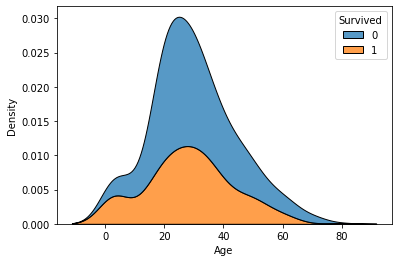

In [65]:
sns.kdeplot(data=data_train,x="Age",hue="Survived",multiple='stack')

<AxesSubplot:xlabel='Age', ylabel='Density'>

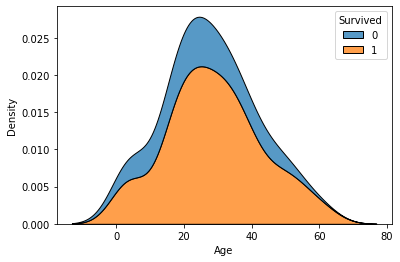

In [73]:
#dencity of probabilty of surviving for female
sns.kdeplot(data=data_train.query('Sex=="female"'),x="Age",hue="Survived",multiple='stack')

In [81]:
# data_train.groupby(['Sex']).mean()
# data_train.groupby(['Sex']).max()
# data_train.groupby(['Sex']).min()

In [205]:
def bar_chart(feature):
    survived = data_train[data_train['Survived']==1][feature].value_counts()
    dead = data_train[data_train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

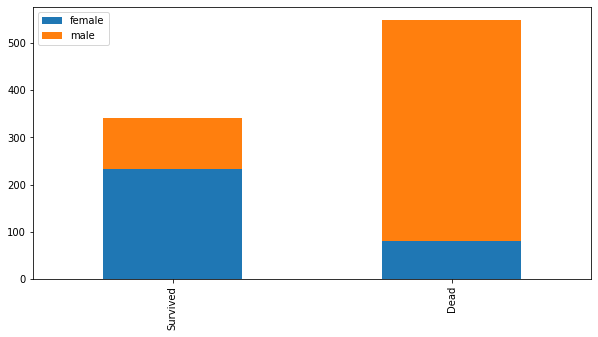

In [206]:
bar_chart('Sex')

In [85]:
data_train.groupby(['Sex']).Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [92]:
data_train.groupby(['Sex','Pclass']).Survived.mean()
data_train.groupby(['Sex','Pclass']).agg({'Survived':'mean'})
# these two lines do the same things

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [94]:
def survived_predict(sex,pclass):
    if sex == 'female':
        if pclass in [1,2]:
            return 'Survived'
        
    if sex == 'male':
        if pclass in [2,3]:
            return 'Not Survived'
    
    return "Not Survived"

In [98]:
survived_predict("female",1)

'Survived'

In [100]:
def get_title(name):
    return name.split(', ')[1].split('.')[0]

In [147]:

for i in range(len(data_train)):
        titles = [get_title(title) for title in data_train.Name ]

pd.DataFrame(titles)


,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [146]:
data_train["title"] = data_train.apply(lambda x: get_title(x.Name),axis = 1)
data_train.groupby(["title"]).Survived.mean()

title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64

In [156]:
data_train["has_cabin"] = 1
data_train.loc[data_train.Cabin.isnull(),'has_cabin']=0
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


<AxesSubplot:xlabel='Age', ylabel='Density'>

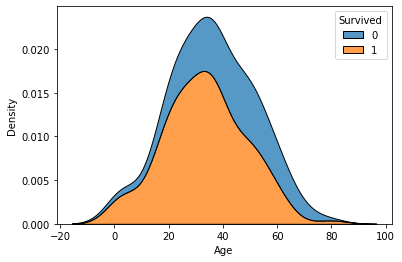

In [160]:
#dencity of probabilty of surviving for female
sns.kdeplot(data=data_train.query('has_cabin==1'),x="Age",hue="Survived",multiple='stack')

In [174]:
data_train.groupby(['Embarked']).agg({"Survived":['mean','count']})

Survived      
              mean count
Embarked                
C         0.558824   170
Q         0.389610    77
S         0.336957   644

In [178]:
data_train.groupby(['title']).agg({'Survived':['mean','count']})

Survived      
                  mean count
title                       
Capt          0.000000     1
Col           0.500000     2
Don           0.000000     1
Dr            0.428571     7
Jonkheer      0.000000     1
Lady          1.000000     1
Major         0.500000     2
Master        0.575000    40
Miss          0.697802   182
Mlle          1.000000     2
Mme           1.000000     1
Mr            0.156673   517
Mrs           0.792000   125
Ms            1.000000     1
Rev           0.000000     6
Sir           1.000000     1
the Countess  1.000000     1

<AxesSubplot:xlabel='Fare', ylabel='Density'>

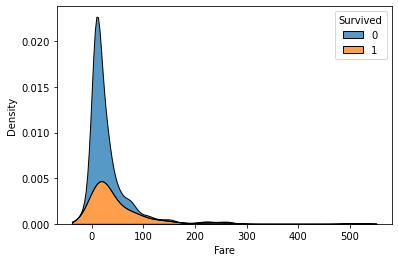

In [183]:
#dencity of probabilty of surviving for female
sns.kdeplot(data=data_train,x="Fare",hue="Survived",multiple='stack')

In [196]:
data_train_ticket = data_train.groupby(["Ticket"]).agg({"PassengerId":'count'}).reset_index()

In [209]:
new_data_train = data_train.merge(data_train_ticket, left_on='Ticket', right_on='Ticket').copy()

<AxesSubplot:xlabel='std_Fare', ylabel='Density'>

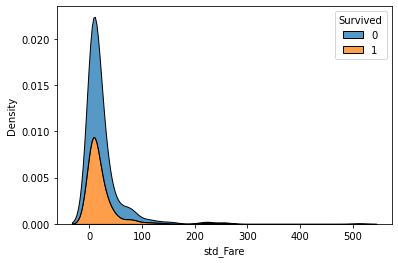

In [214]:
new_data_train['std_Fare'] = data_train["Fare"]/new_data_train['PassengerId_y']
sns.kdeplot(data=new_data_train,x="std_Fare",hue="Survived",multiple='stack') # use log here!!!

In [223]:
new_data_train['family_size'] = 1 + new_data_train.SibSp + new_data_train.Parch
new_data_train.family_size

0      2
1      2
2      1
3      2
4      2
      ..
886    1
887    1
888    1
889    1
890    1
Name: family_size, Length: 891, dtype: int64

<AxesSubplot:xlabel='family_size', ylabel='Survived'>

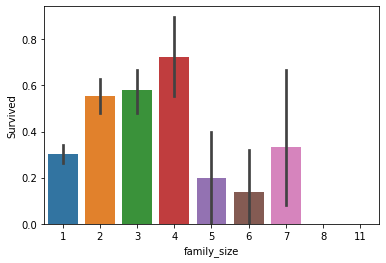

In [225]:
sns.barplot(x='family_size',y='Survived',data=new_data_train)

In [228]:
new_data_train.groupby(['family_size']).agg({'Survived':['mean','count']})

Survived      
                 mean count
family_size                
1            0.303538   537
2            0.552795   161
3            0.578431   102
4            0.724138    29
5            0.200000    15
6            0.136364    22
7            0.333333    12
8            0.000000     6
11           0.000000     7

<AxesSubplot:xlabel='family_class', ylabel='Survived'>

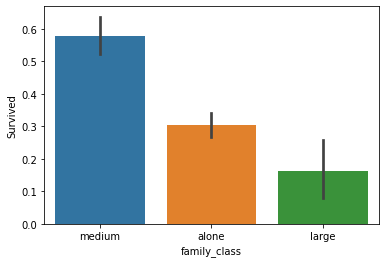

In [231]:
def get_family_class(s):
    if s == 1:
        return 'alone'
    elif s <5:
        return 'medium'
    else:
        return 'large'

new_data_train['family_class'] = new_data_train.apply(lambda x: get_family_class(x.family_size),axis = 1)
sns.barplot(x='family_class',y='Survived',data=new_data_train)
# data_train.apply(lambda x: get_title(x.Name),axis = 1)

<AxesSubplot:xlabel='title', ylabel='Survived'>

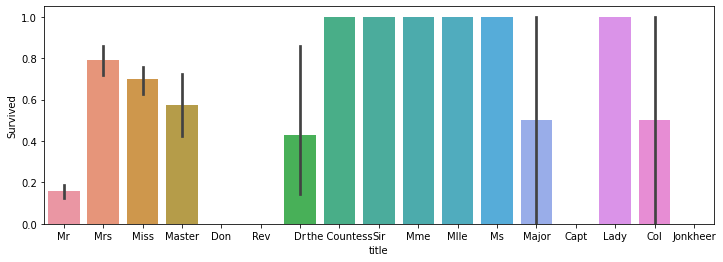

In [234]:
plt.figure(figsize=(12,4))
sns.barplot(x='title',y='Survived',data=new_data_train)

In [239]:
# new_data_train.groupby(['title']).agg({'Age':['mean','count']})

In [241]:
# rares = ['Don',"Rev"."Dr",""] continue classifier les trois class 

In [246]:
new_data_train.Age.value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
0.67      1
20.50     1
14.50     1
70.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [249]:
new_data_train.groupby(['Age',"Pclass","title"]).agg({"Survived":['mean','count']}).head(20)

Survived      
                        mean count
Age  Pclass title                 
0.42 3      Master  1.000000     1
0.67 2      Master  1.000000     1
0.75 3      Miss    1.000000     2
0.83 2      Master  1.000000     2
0.92 1      Master  1.000000     1
1.00 2      Master  1.000000     2
     3      Master  0.333333     3
            Miss    1.000000     2
2.00 1      Miss    0.000000     1
     2      Master  1.000000     1
            Miss    1.000000     1
     3      Master  0.000000     3
            Miss    0.250000     4
3.00 2      Master  1.000000     2
            Miss    1.000000     1
     3      Master  1.000000     2
            Miss    0.000000     1
4.00 1      Master  1.000000     1
     2      Miss    1.000000     2
     3      Master  0.250000     4